# Statistical Analysis of Motherhood in the Workforce

In this notebook we will discover the statistical significance of gender pay gap, motherhood pay gap, and whether there is a correlation between having children and salary.

From EDA, we discovered the following:

1. There is an apparent gender pay gap observed from this survey despite having the same creditials, working in sectors, and having the same number of children.
2. Women with children get paid the same amount as women without children.
3. Men and women with children work in different industries that pay at opposite extremes of the salary range spectrum.
4. Men with children are more likely to be supervisors than women with children.
5. Women with children are more likely to leave their jobs for family than men with children.

As a continuance, we will use statistics to confirm what these visualizations imply.

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("talk")
%matplotlib inline 

In [2]:
from scipy import stats

In [3]:
#read file and remove null values
df = pd.read_csv('highered_00005.csv', na_values=[96, 99, 98, 9996, 9998, 9999, 999996, 999998, 999999, 9999998, 9999999])
df['CHTOT'] = df['CHTOT'].fillna(0)
df['CHFAM'] = df['CHFAM'].fillna(0)

In [4]:
#use string categorical data to replace numerical data
gen_map = {1:'Female', 2:'Male'}
df['GENDERS'] = df['GENDER'].map(gen_map)

race_map = {1:'Asian', 2:'White', 3:'other minorities', 4:'Other'}
df['RACE'] = df['RACETH'].map(race_map)

deg_map = {1:'Bachelors',2:'Masters', 3:'Doctorate', 4:'Professional'}
df['DEGREE'] = df['DGRDG'].map(deg_map)

LF_map = {1: 'Employed', 2: 'Unemployed'}
df['LFSTATS'] = df['LFSTAT'].map(LF_map)
df['LFSTATS'] = df['LFSTATS'].replace(3,np.NaN)

ES_map = {1:'2 yr college',2:'4 yr college',3:'Government',4:'Industry',5:'Non_US government'}
df['EMSECS'] = df['EMSEC'].map(ES_map)

new_map = {0:'NO', 1:'YES'}
df['NEWBUSS'] = df['NEWBUS'].map(new_map)

work_map = {1:'RND',2:'Teaching',3:'Admin',4:'Computer apps', 5:'Other'}
df['WORK'] = df['WAPRSM'].map(work_map)

sup_map = {0:'No',1:'Yes'}
df['SUPERVISORY'] = df['SUPWK'].map(sup_map)

change_map = {0:'No',1:'Yes'}
df['FAMILY'] = df['CHFAM'].map(change_map)

In [5]:
#drop irrelevant columns
df = df.drop(['SURID', 'WEIGHT', 'SAMPLE', 'GENDER', 'RACETH', 'DGRDG', 'LFSTAT', 'EMSEC', 'NEWBUS', 'WAPRSM', 'SUPWK', 'CHFAM'], axis=1)

In [6]:
#quick overview of dataframe
df.head()

,PERSONID,YEAR,AGE,CHTOT,EMSIZE,SALARY,GENDERS,RACE,DEGREE,LFSTATS,EMSECS,NEWBUSS,WORK,SUPERVISORY,FAMILY
0,50000030000000003,2003,47,1.0,3.0,35000.0,Female,White,Bachelors,Employed,2 yr college,NO,Teaching,Yes,No
1,50000030000000004,2003,66,0.0,1.0,66000.0,Male,White,Bachelors,Employed,Industry,NO,RND,Yes,No
2,50000030000000005,2003,60,0.0,6.0,102000.0,Female,White,Bachelors,Employed,Industry,NO,Admin,Yes,No
3,50000030000000006,2003,30,0.0,8.0,81000.0,Male,White,Masters,Employed,Industry,NO,RND,Yes,No
4,50000030000000104,2003,68,0.0,NaN,NaN,Female,White,Masters,NaN,NaN,NaN,NaN,NaN,No


In [7]:
#a dataframe for 2003 survey only
df_2003 = df[df['YEAR'] == 2003]

#a datafram for 2013 survey only
df_2013 = df[df['YEAR'] == 2013]

#a dataframe for bachelor, masters, doctorate, and professional degrees 
df_bachelor = df[(df['DEGREE'] == 'Bachelors')]
df_ma = df[(df['DEGREE'] == 'Masters')]
df_dr = df[df['DEGREE'] == 'Doctorate']
df_prof = df[(df['DEGREE'] == 'Professional')]

#a datafram for those with children
df_child = df[df['CHTOT']!=0]

# Visual of gender pay gap between 2003 and 2013

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

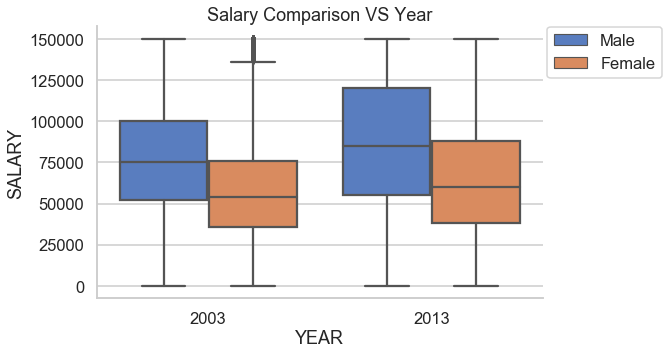

In [8]:
#bar plot of gender and salary between a 10 year gap 
fig=plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)
sns.boxplot(data=df, y = 'SALARY', 
            x = 'YEAR', hue = 'GENDERS',
            hue_order=['Male','Female'], 
            palette="muted", ax=ax)
sns.despine()
plt.title('Salary Comparison VS Year')
lgd=ax.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.tight_layout

## What is the gender pay difference in 2003 and 2013

In [9]:
m_2003=df_2003[df_2003['GENDERS']=='Male']['SALARY'].mean()
f_2003=df_2003[df_2003['GENDERS']=='Female']['SALARY'].mean()
(m_2003-f_2003)/m_2003

0.2573725045432094

In [10]:
m_2013=df_2013[df_2013['GENDERS']=='Male']['SALARY'].mean()
f_2013=df_2013[df_2013['GENDERS']=='Female']['SALARY'].mean()
(m_2013-f_2013)/m_2013

0.24860750807863138

Based on the calculation above, we see that in a 10 year span, there has been no decrease in the gender pay gap.

# Is gender pay gap statistically significant?

Explore the salary gap between men and women in full dataset.

Define null hypothesis as men and women report the same average salary: $$s_m = s_f$$ Alternative hypothesis: $$s_m \neq s_f$$

Use two sample t test for the difference of means to test:

In [11]:
salary_m = df[df['GENDERS']=='Male']['SALARY']
salary_f = df[df['GENDERS']=='Female']['SALARY']
diff_perc_s = (np.mean(salary_m)-np.mean(salary_f))/np.mean(salary_f)
print('The mean salary for men is {0:.2f} % higher than women.'.format(round(diff_perc_s*100,2)))
stats.ttest_ind(salary_m.dropna(), salary_f.dropna(),  equal_var = False)

The mean salary for men is 32.71 % higher than women.


Ttest_indResult(statistic=111.83071627413051, pvalue=0.0)

With a p value of 0.0, we reject the null hypothesis!

### There is a statistical difference in mean salary between men and women
The calculation above shows that men get paid 33% more than women! That's a huge difference!

Now, let's explore if the same is true for men and women with children.

# What is the gender pay difference between men and women with children?

In [12]:
wc_2003=df_child[df_child['YEAR']==2003]
wc_2013=df_child[df_child['YEAR']==2013]

mwc_2003=wc_2003[wc_2003['GENDERS']=='Male']['SALARY'].mean()
fwc_2003=wc_2003[wc_2003['GENDERS']=='Female']['SALARY'].mean()
(mwc_2003-fwc_2003)/mwc_2003

0.29357306749116074

In [13]:
mwc_2013=wc_2013[wc_2013['GENDERS']=='Male']['SALARY'].mean()
fwc_2013=wc_2013[wc_2013['GENDERS']=='Female']['SALARY'].mean()
(mwc_2013-fwc_2013)/mwc_2013

0.28256001072951176

When we separate men and women with children, we see that pay difference increases from 25% in 2013 to 28%. Now, let's explore if there is a statistical signifance in the pay gap between men and women with children.

## Is the gender pay gap with children statistically significant?

Explore the salary gap between men and women with children.

Define null hypothesis as men and women with children report the same average salary: $$s_mwc = s_fwc$$ Alternative hypothesis: $$s_mwc \neq s_fwc$$

Use two sample t test for the difference of means to test:

In [14]:
salary_mwc = df_child[df_child['GENDERS']=='Male']['SALARY']
salary_fwc = df_child[df_child['GENDERS']=='Female']['SALARY']
diff_perc_s = (np.mean(salary_mwc)-np.mean(salary_fwc))/np.mean(salary_fwc)
print('The mean salary for men is {0:.2f} % higher than women.'.format(round(diff_perc_s*100,2)))
stats.ttest_ind(salary_mwc.dropna(), salary_fwc.dropna(),  equal_var = False)

The mean salary for men is 38.74 % higher than women.


Ttest_indResult(statistic=93.0584132233896, pvalue=0.0)

Here we can also reject the null hypothesis with a p value of 0.0. 

### There is a statistical difference in salary between men and women with children!
We see that men with children make 39% more than women. In comparison to the overall study, this is an increase of 6% in difference!

# What is the pay difference between women with and without children?

In [15]:
#create df of men and women without children for easy manipulation
df_nc = df[df['CHTOT']==0]

In [16]:
nc_2003=df_nc[df_nc['YEAR']==2003]
nc_2013=df_nc[df_nc['YEAR']==2013]

fnc_2003=nc_2003[nc_2003['GENDERS']=='Female']['SALARY'].mean()
fwc_2003=wc_2003[wc_2003['GENDERS']=='Female']['SALARY'].mean()
(fnc_2003-fwc_2003)/fnc_2003

0.005470754925938834

In [18]:
fnc_2013=nc_2013[nc_2013['GENDERS']=='Female']['SALARY'].mean()
fwc_2013=wc_2013[wc_2013['GENDERS']=='Female']['SALARY'].mean()
(fnc_2013-fwc_2013)/fnc_2013

-0.08416939345214243

Between 2003 and 2013, we see that the pay difference between women with and without children actually decreased!

## Is the children pay gap statistically significant?
Explore the salary gap between women with and without children.

Define null hypothesis as women with and without children report the same average salary: $$s_fnc = s_fwc$$ Alternative hypothesis: $$s_fnc \neq s_fwc$$

Use two sample t test for the difference of means to test:

In [19]:
salary_fnc = df_nc[df_nc['GENDERS']=='Female']['SALARY']
salary_fwc = df_child[df_child['GENDERS']=='Female']['SALARY']
diff_perc_s = (np.mean(salary_fnc)-np.mean(salary_fwc))/np.mean(salary_fwc)
print('The mean salary for women without children is {0:.2f} % higher than women with children.'.format(round(diff_perc_s*100,2)))
stats.ttest_ind(salary_fnc.dropna(), salary_fwc.dropna(),  equal_var = False)

The mean salary for women without children is -4.00 % higher than women with children.


Ttest_indResult(statistic=-9.218349788120044, pvalue=3.1042903973097717e-20)

Based on the pvalue, we can reject the null hypothesis! Women with children and those without do not report the same salary averages. We see that women without children make 4% less than women with children! 

# Is there a correlation between having children and salary?

Explore correlation between salary and having children.

Define null hypothesis as no significant correlation between salary and having children: $$s_s = s_c$$ Alternative hypothesis: $$s_s \neq s_c$$

In [20]:
data = pd.concat([df['SALARY'], df['CHTOT']], axis=1)
data.corr()

,SALARY,CHTOT
SALARY,1.000000,0.112075
CHTOT,0.112075,1.000000


In [44]:
stats.ttest_ind(df['SALARY'].dropna(), df['CHTOT'].dropna(),  equal_var = False)

Ttest_indResult(statistic=797.2977994947405, pvalue=0.0)

Here we also have a p value of 0.0 allowing us to reject our null hypothesis. There is a significant correlation between salary and having children. According to the correlation function above, salary and having children share a slight positive correlation.

In [ ]:
data_1 = pd.concat